<a href="https://colab.research.google.com/github/ayandalab/USTLD-/blob/main/USTLD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[0.448004883, 0.23774279, 0.10478013, 0.037104011, 0.010202285, 0.002105107, 0.000317365, 3.4632e-05, 2.77e-06]
[0.425205759, 0.221373318, 0.09555517, 0.033339514, 0.009199538, 0.001960754, 0.0003147, 3.7352e-05, 3.274e-06]


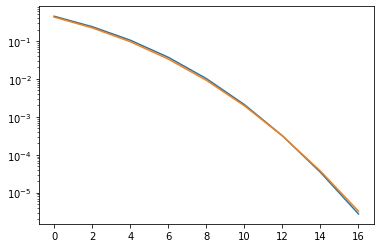

In [1]:
import math
import matplotlib.pyplot as plt


def biterrors(a,b):
    count = 0
    for i in range(0,32):
        if (((a >> i) & 1) != (b >> i) & 1):
            count = count + 1
    return count


def mappoints(map, mapper):
    mapped = {}
    for i in range(len(mapper)):
        for j in map.keys():
            if j == mapper[i]:
                #print(mapper[i], map.get(i))
                mapped[j] = map.get(i)
    return mapped


def USTLD_Theory(mapper1, mapper2, map, n, Nr, SNR):
    M = 16
    r = math.log2(M)
    d1 = 0
    d2 = 0
    BER = 0

    SNR = 10**(SNR/10)

    m1 = mappoints(map, mapper1)
    m2 = mappoints(map, mapper2)

    for i in range(0, M - 1):
            for j in range(0, M - 1):
                second = 0
                first = 0
                a,b,c,d = 0,0,0,0
                d1,d2 = 0,0
                if i != j:
                    d1 = abs(m1[i] - m1[j])
                    d2 = abs(m2[i] - m2[j])
                    Nqq = biterrors(i, j)
                    a = math.pow((1 + ((SNR / 8) * d1)),(-Nr))
                    b = math.pow((1 + ((SNR / 8) * d2)), (-Nr))
                    first = 0.5 * a * b
                    for k in range(1, n-1):
                        Sk = math.pow(math.sin((k * math.pi) / (2 * n)), 2)
                        c = math.pow((1 + ((SNR / 8) * d1 * (1 / Sk))),(-Nr))
                        d = math.pow((1 + ((SNR / 8) * d2 * (1 / Sk))),(-Nr))
                        second = second + (c * d)
                    BER = BER + Nqq * (1 / (2 * n)) * (first + second)
    BER = (1 / (M * r)) * BER
    return round(BER,9)

M = 16

map = {
0:complex(1,0), 1:complex(0.9808,0.1951), 2:complex(0.8315,0.5556), 3:complex(0.9239,0.3827),
4:complex(0.1951,0.9809), 5:complex(0.3827,0.9239), 6:complex(0.707,0.707), 7:complex(0.5556,0.8315),
8:complex(-0.9808,0.1951), 9:complex(-0.9239,0.3827), 10:complex(-0.707,0.707), 11:complex(-0.8315,0.5556),
12:complex(0,1), 13:complex(-0.1951,0.9808), 14:complex(-0.5556,0.8315), 15:complex(-0.3827,0.9239),
16:complex(0.9808,-0.1951), 17:complex(0.9239,-0.3827), 18:complex(0.707,-0.707), 19:complex(0.8315,-0.5556),
20:complex(0,-1), 21:complex(0.1951,-0.9808), 22:complex(0.5556,-0.8315), 23:complex(0.3827,-0.9239),
24:complex(-1,0), 25:complex(-0.9808,-0.1951), 26:complex(-0.8315,-0.5556), 27:complex(-0.9239,-0.3827),
28:complex(-0.1951,-0.9808), 29:complex(-0.3827,-0.9239), 30:complex(-0.707,-0.707), 31:complex(-0.5556,-0.8315)
}

mapper = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31]
mapper2 = [31,1,2,28,27,5,6,24,23,9,10,20,19,13,14,16,15,17,18,12,11,21,22,8,7,25,26,4,3,29,30,0]
mapper3 = 4, 31, 17, 10, 29, 24, 26, 21, 30, 23, 1, 11, 18, 7, 15, 20, 8, 3, 27, 13, 6, 14, 16, 28, 12, 2, 19, 9, 22, 0, 25, 5
mapper4 = 16,1,22,12,18,5,14,28,9,2,26,17,30,4,23,0,19,25,8,29,11,21,6,24,31,15,3,10,27,13,20,7
maps = [mapper, mapper2]

SNR = [0,2,4,6,8,10,12,14,16]

BER1, BER2 = [], []

for i in range(len(SNR)):
    BER1.append(USTLD_Theory(mapper,mapper3,map,10,4,SNR[i]))

for i in range(len(SNR)):
    BER2.append(USTLD_Theory(mapper,mapper4,map,10,4,SNR[i]))

print(BER1)
print(BER2)

plt.semilogy(SNR,BER1)
plt.semilogy(SNR,BER2)
plt.xticks()
plt.show()